In [27]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as ode

In [28]:
# Solución analítica
def posicion(t,v0,x0):
    return x0+(v0*t)-((g/2)*t**2)+u*t*np.log(m0)+(u/D)*((m0-D*t)*np.log(m0-D*t)+D*t-m0*np.log(m0))

def velocidad(t,v0):
    return v0+u*np.log((m0)/(m0-D*t))-g*t

In [69]:
# Ecuación diferencial
def ecu_dif(t,a):
    x=a[0]
    v=a[1]
    # Para tener la ecuación de segundo grado se sustituye la primera derivada por un valor
    # al estar midiendo posición y velocidad la primera derivada se define como la velocidad
    dx=v
    # Derivada de la velocidad
    dv=(u*(D/(m0-(D*t))))-g
    return [dx,dv]

In [85]:
# Condiciones iniciales y datos termodinámicos [1]
a=[0,0] # Velocidad y posición inicial
u=31935 # Velocidad de salida del combustible respecto al cohete 
m0=549054 # Masa inicial
D=397 # Masa expulsada respecto al tiempo
g=9.79203 # Gravedad

# Vector de tiempo
t=(0,200)

# Solución
solv=ode.solve_ivp(ecu_dif,t,a,max_step=1)

In [86]:
# Se toman los tiempos que nos dio la solución
t1=solv.t

x=solv.y.T
x1=x[:,1]
x2=x[:,0]

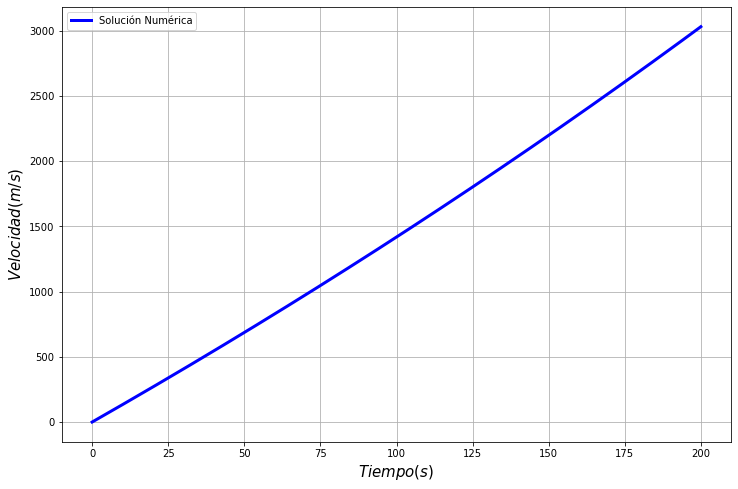

In [72]:
# Gráfica de la solución
plt.figure(figsize=(12,8))
plt.plot(t1,x1,'b',lw=3,label='Solución Numérica')

plt.xlabel('$Tiempo (s)$',fontsize=15)
plt.ylabel('$Velocidad (m/s)$',fontsize=15)

plt.legend(loc='best')
plt.grid()
plt.show()

In [74]:
# Solución analítica con el tiempo de la solución
x1_ana=velocidad(t1,a[1])
x2_ana=posicion(t1,a[1],a[0])

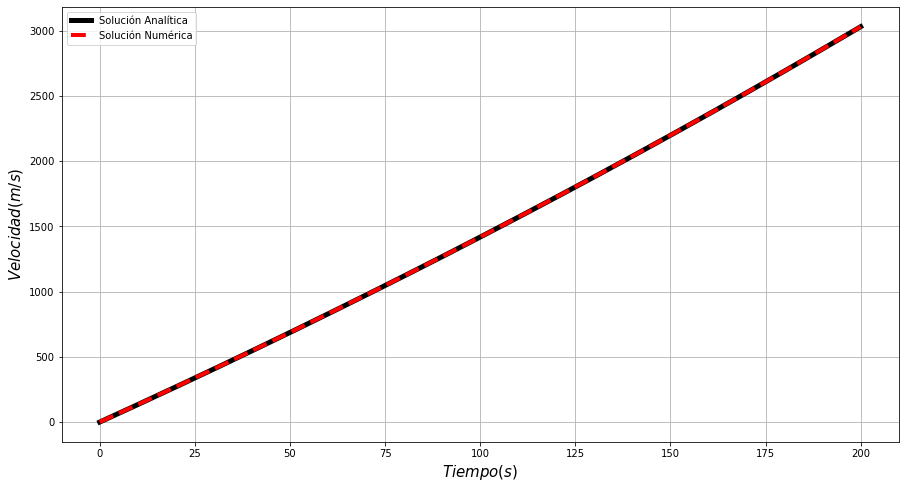

In [76]:
# Gráfica de comparación entre solución numérica y solución analítica
plt.figure(figsize=(15,8))

plt.plot(t1,x1_ana,'k',lw=5,label='Solución Analítica')
plt.plot(t1,x1,'--r',lw=4,label='Solución Numérica')

plt.xlabel('$Tiempo (s)$',fontsize=15)
plt.ylabel('$Velocidad (m/s)$',fontsize=15)

plt.legend(loc='best')
plt.grid()
plt.show()

In [77]:
x1.shape, x1_ana.shape
x1=x1.reshape(len(x1))
x1.shape, x1_ana.shape

((205,), (205,))

In [78]:
error = np.abs(x1-x1_ana)

In [82]:
# Error de aproximación
error = np.abs(x1-x1_ana)

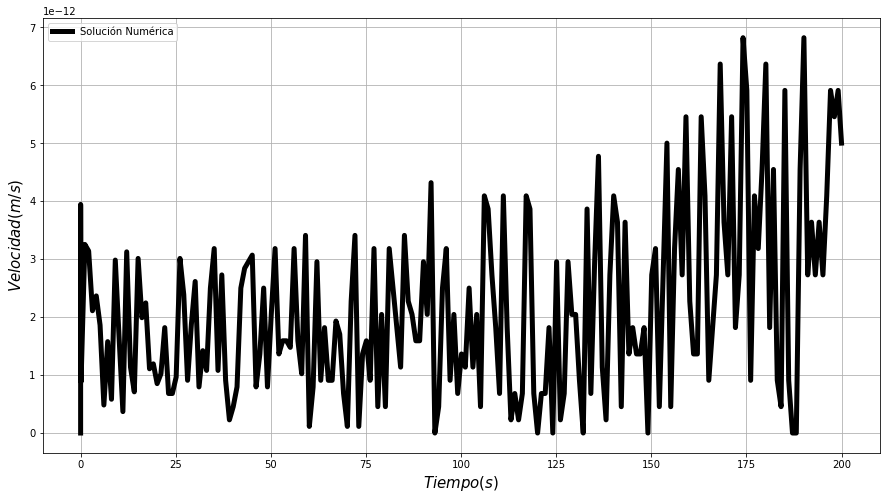

In [84]:
# Gráfica del error
plt.figure(figsize=(15,8))

plt.plot(t,error,'k',lw=5, label='Solución Numérica')

plt.xlabel('$Tiempo (s)$',fontsize=15)
plt.ylabel('$Velocidad (m/s)$',fontsize=15)

plt.legend(loc='best')
plt.grid()
plt.show()

### Referencias:
[1] Falcon 9. (n.d.). SpaceX. https://www.spacex.com/vehicles/falcon-9/